In [7]:
import pandas as pd
import numpy as np
import INS_Analysis as insd
import seaborn as sns
import matplotlib.pyplot as plt

In [8]:
generator_path = '../data/'
spectrums = generator_path+'spectrums.npz'
spectrums = np.load(spectrums)
bins = spectrums['x']
spectrums = spectrums['y']
detector_spectrums = spectrums

gebless_spectrums = generator_path+'gebless_spectrums.npz'
gebless_spectrums = np.load(gebless_spectrums)
gebless_spectrums = gebless_spectrums['y']

soil_fluxes = generator_path+'soil_fluxes.npz'
soil_fluxes = np.load(soil_fluxes)
soil_fluxes = soil_fluxes['y']

In [9]:
filenames_path = '../filenames.csv'
filenames = pd.read_csv(filenames_path)['name']

In [10]:
detector_spectrums[:, 0].shape

(4, 935)

In [11]:
# make dataframe
df = pd.DataFrame()
df['filename'] = filenames
df['detector'] = detector_spectrums[:, 0].tolist()
df['gebless'] = gebless_spectrums[:, 0].tolist()

In [12]:
df

,filename,detector,gebless
0,tnm_c,"[0.00017666, 1.19e-07, 0.000105117, 6.0493e-05...","[3.3e-08, 0.00035059, 3.962e-06, 6.379e-06, 6...."
1,tnm_si,"[0.000332717, 2.41e-07, 0.000197307, 0.0001127...","[9.3e-08, 0.000659009, 7.946e-06, 1.0843e-05, ..."
2,tnm_al203,"[0.000292088, 2e-07, 0.000174911, 9.8536e-05, ...","[8.1e-08, 0.00058002, 6.398e-06, 9.749e-06, 1...."
3,tnm_c50si50,"[0.000257817, 1.81e-07, 0.000152064, 8.6541e-0...","[5.6e-08, 0.000509252, 5.556e-06, 8.224e-06, 9..."


In [13]:
df.filename.to_list()

['tnm_c', 'tnm_si', 'tnm_al203', 'tnm_c50si50']

In [14]:
def plott(spectrums, suptitle):
    fig, axs = plt.subplots(2, 2, figsize=(15, 10))
    fig.suptitle(suptitle)
    c_center = 4.44
    c_width = 0.15
    c_window = [c_center - c_width, c_center + c_width]
    c_maxs = []
    c_mins = []
    for i in range(len(spectrums)):
        axs[0, 1].plot(bins, spectrums[i][0], label=filenames[i], marker='o')
        c_maxs.append(np.max(spectrums[i][0][(bins > c_window[0]) & (bins < c_window[1])]))
        c_mins.append(np.min(spectrums[i][0][(bins > c_window[0]) & (bins < c_window[1])]))
        # draw stem plots for spectrum
    axs[0, 1].legend()
    axs[0, 1].set_title('Carbon Window (Zoomed)')
    axs[0, 1].set_xlabel('MeV')
    axs[0, 1].set_ylabel('Intensity')
    axs[0, 1].set_xlim(c_center - c_width, c_center + c_width)
    axs[0, 1].set_ylim(np.min(c_mins), np.max(c_maxs))

    # Third subplot
    si_center = 1.78
    si_width = 0.15
    si_window = [si_center - si_width, si_center + si_width]
    si_maxs = []
    si_mins = []
    for i in range(len(spectrums)):
        axs[1, 0].plot(bins, spectrums[i][0], label=filenames[i], marker='o')
        print(len(spectrums[i][0][(bins > si_window[0]) & (bins < si_window[1])]))
        si_maxs.append(np.max(spectrums[i][0][(bins > si_window[0]) & (bins < si_window[1])]))
        si_mins.append(np.min(spectrums[i][0][(bins > si_window[0]) & (bins < si_window[1])]))
    axs[1, 0].legend()
    axs[1, 0].set_title('Silicone Window (Zoomed)')
    axs[1, 0].set_xlabel('MeV')
    axs[1, 0].set_ylabel('Intensity')
    axs[1, 0].set_xlim(si_center - si_width, si_center + si_width)
    axs[1, 0].set_ylim(np.min(si_mins), np.max(si_maxs))

    # Fourth subplot
    low_window = [0.1, 1]
    low_maxs = []
    low_mins = []
    for i in range(len(spectrums)):
        axs[1, 1].plot(bins, spectrums[i][0], label=filenames[i], marker='o')
        low_maxs.append(np.max(spectrums[i][0][(bins > low_window[0]) & (bins < low_window[1])]))
        low_mins.append(np.min(spectrums[i][0][(bins > low_window[0]) & (bins < low_window[1])]))
    axs[1, 1].legend()
    axs[1, 1].set_title('Low Energy (Zoomed)')
    axs[1, 1].set_xlabel('MeV')
    axs[1, 1].set_ylabel('Intensity')
    axs[1, 1].set_xlim(low_window[0], low_window[1])
    axs[1, 1].set_ylim(np.min(low_mins), np.max(low_maxs))

    # First subplot
    for i in range(len(spectrums)):
        axs[0, 0].plot(bins, spectrums[i][0], label=filenames[i])
    axs[0, 0].legend()
    axs[0, 0].set_title('Spectrums')
    axs[0, 0].set_xlabel('MeV')
    axs[0, 0].set_ylabel('Intensity')
    # draw squares around the zoomed regions
    for ax in axs:
        for a in ax:
            a.add_patch(plt.Rectangle((0.1, np.min(low_mins)), 0.9, np.max(low_maxs), fill=None, edgecolor='red'))
            a.add_patch(plt.Rectangle((si_center - si_width, np.min(si_mins)), si_width*2, np.max(si_maxs), fill=None, edgecolor='red'))
            a.add_patch(plt.Rectangle((c_center - c_width, np.min(c_mins)), c_width*2, np.max(c_maxs), fill=None, edgecolor='red'))
    # label the zoomed regions
    axs[0, 0].text((low_window[0]+low_window[1])/2, np.max(low_maxs), 'Low Energy', horizontalalignment='center', verticalalignment='center', transform=axs[0, 0].transData, color='red')
    axs[0, 0].text(c_center, np.max(c_maxs), 'Carbon', horizontalalignment='center', verticalalignment='center', transform=axs[0, 0].transData, color='red')
    axs[0, 0].text(si_center, np.max(si_maxs), 'Silicone', horizontalalignment='center', verticalalignment='center', transform=axs[0, 0].transData, color='red')

    # log_toggle = [True, True, True, True]
    log_toggle = [False, False, False, False]

    for i in range(log_toggle.__len__()):
        if log_toggle[i]:
            axs[i//2, i%2].set_yscale('log')

    # log scale
    plt.tight_layout()
    plt.show()


33
33
33
33


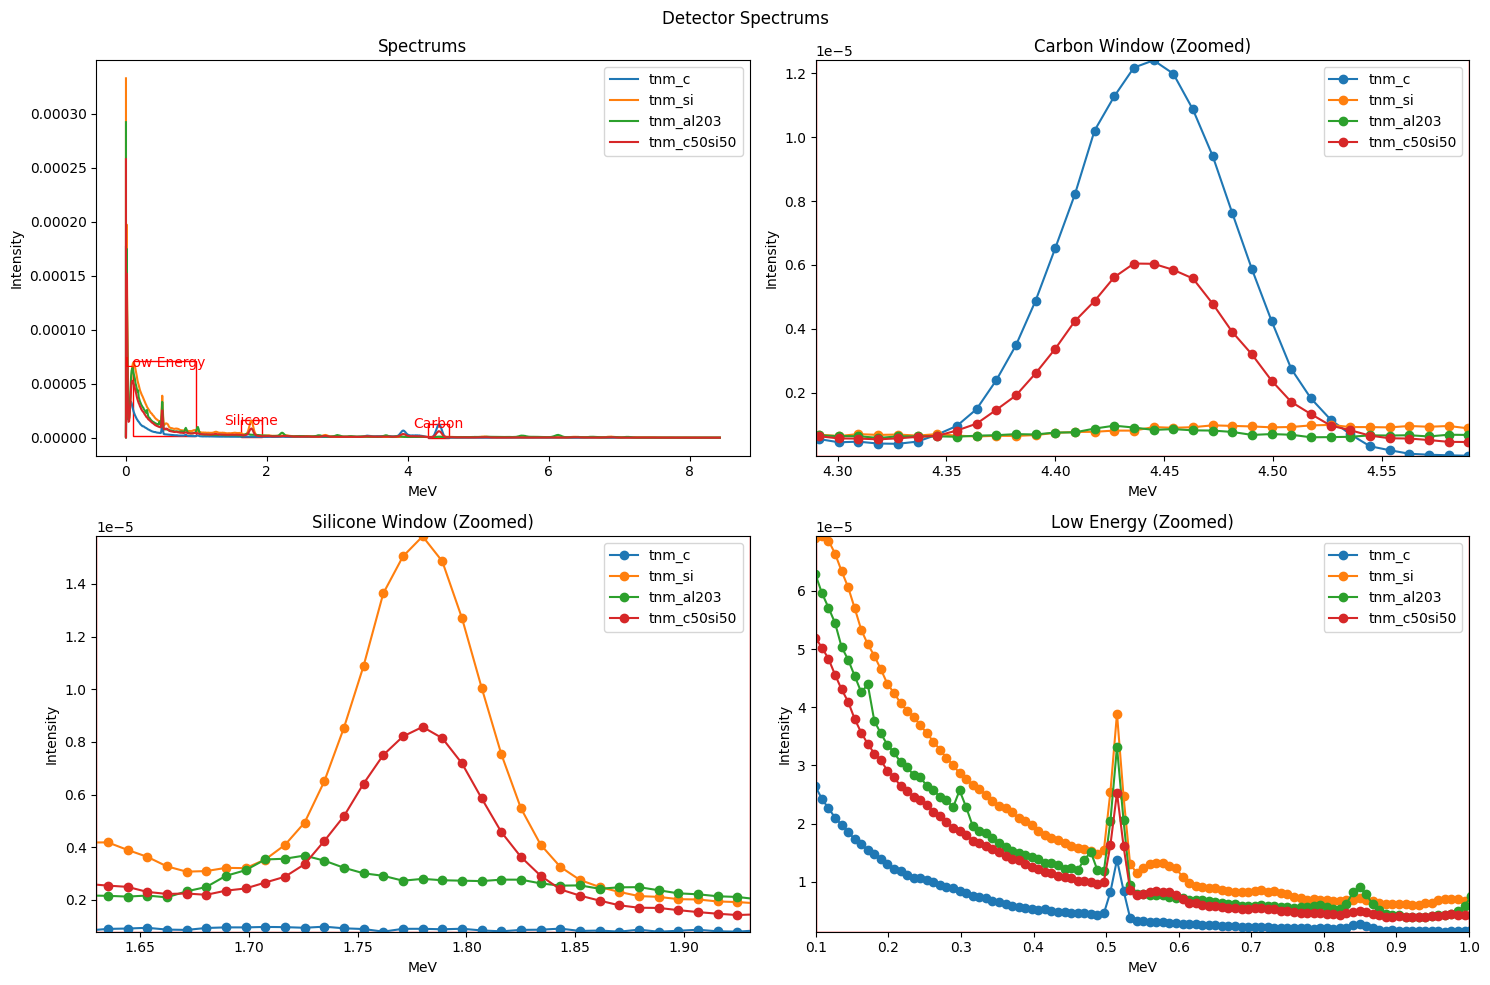

In [15]:
plott(detector_spectrums, 'Detector Spectrums')

33
33
33
33


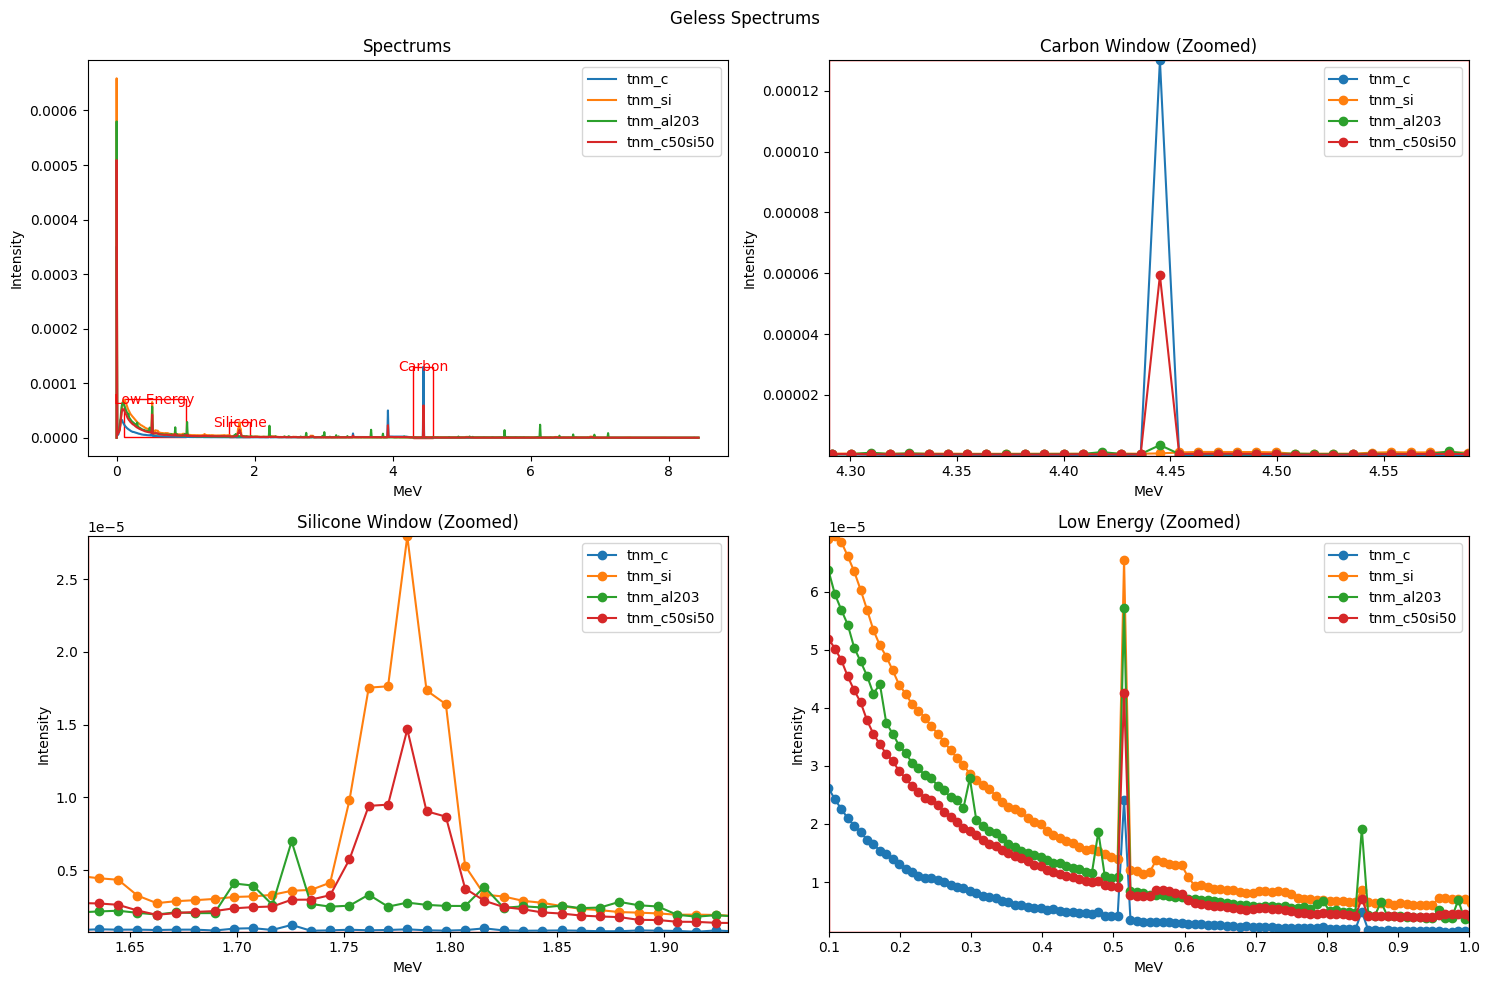

In [16]:
plott(gebless_spectrums, 'Geless Spectrums')

33
33
33
33


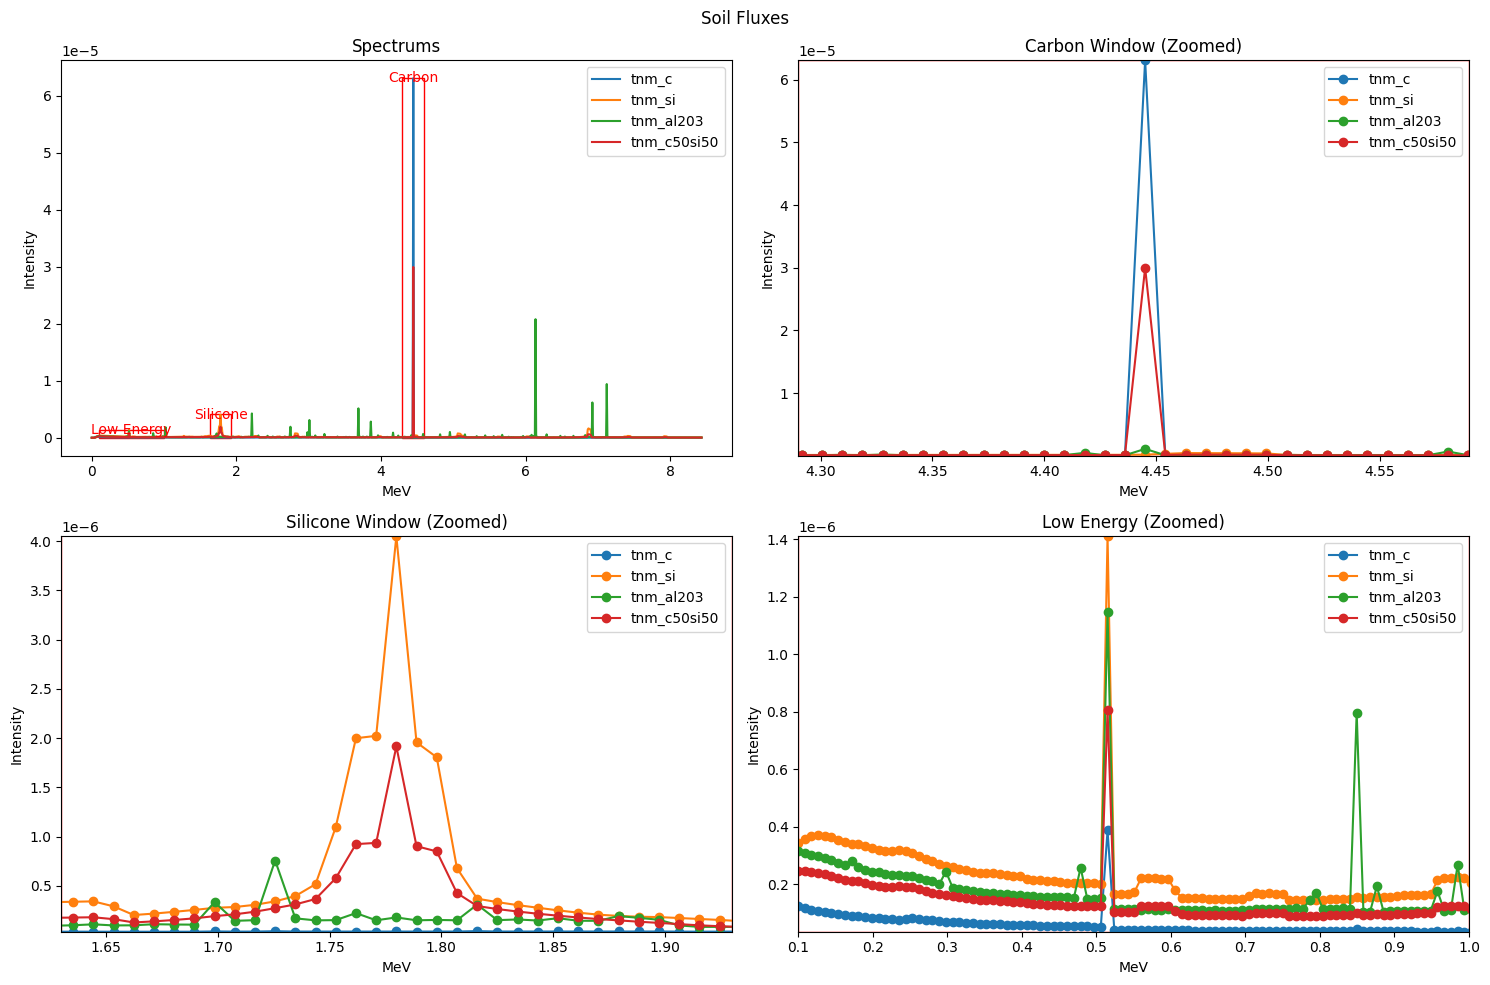

In [17]:
plott(soil_fluxes, 'Soil Fluxes')

In [33]:
import plotly.express as px
import plotly.graph_objects as go

In [34]:
# use plotly to plot the spectrums
def plotly_spectrums(spectrums, suptitle, log_scale=False):
    fig = go.Figure()
    for i in range(len(spectrums)):
        fig.add_trace(go.Scatter(
            x=bins, 
            y=spectrums[i][0], 
            mode='lines+markers', 
            name=filenames[i],
            marker=dict(size=1),
        ))
    fig.update_layout(
        title=suptitle, 
        xaxis_title='MeV', 
        yaxis_title='Intensity',
        yaxis_type='log' if log_scale else 'linear'
    )
    fig.show()

In [35]:
plotly_spectrums(detector_spectrums, 'Detector Spectrums', log_scale=True)

33
33
33
33


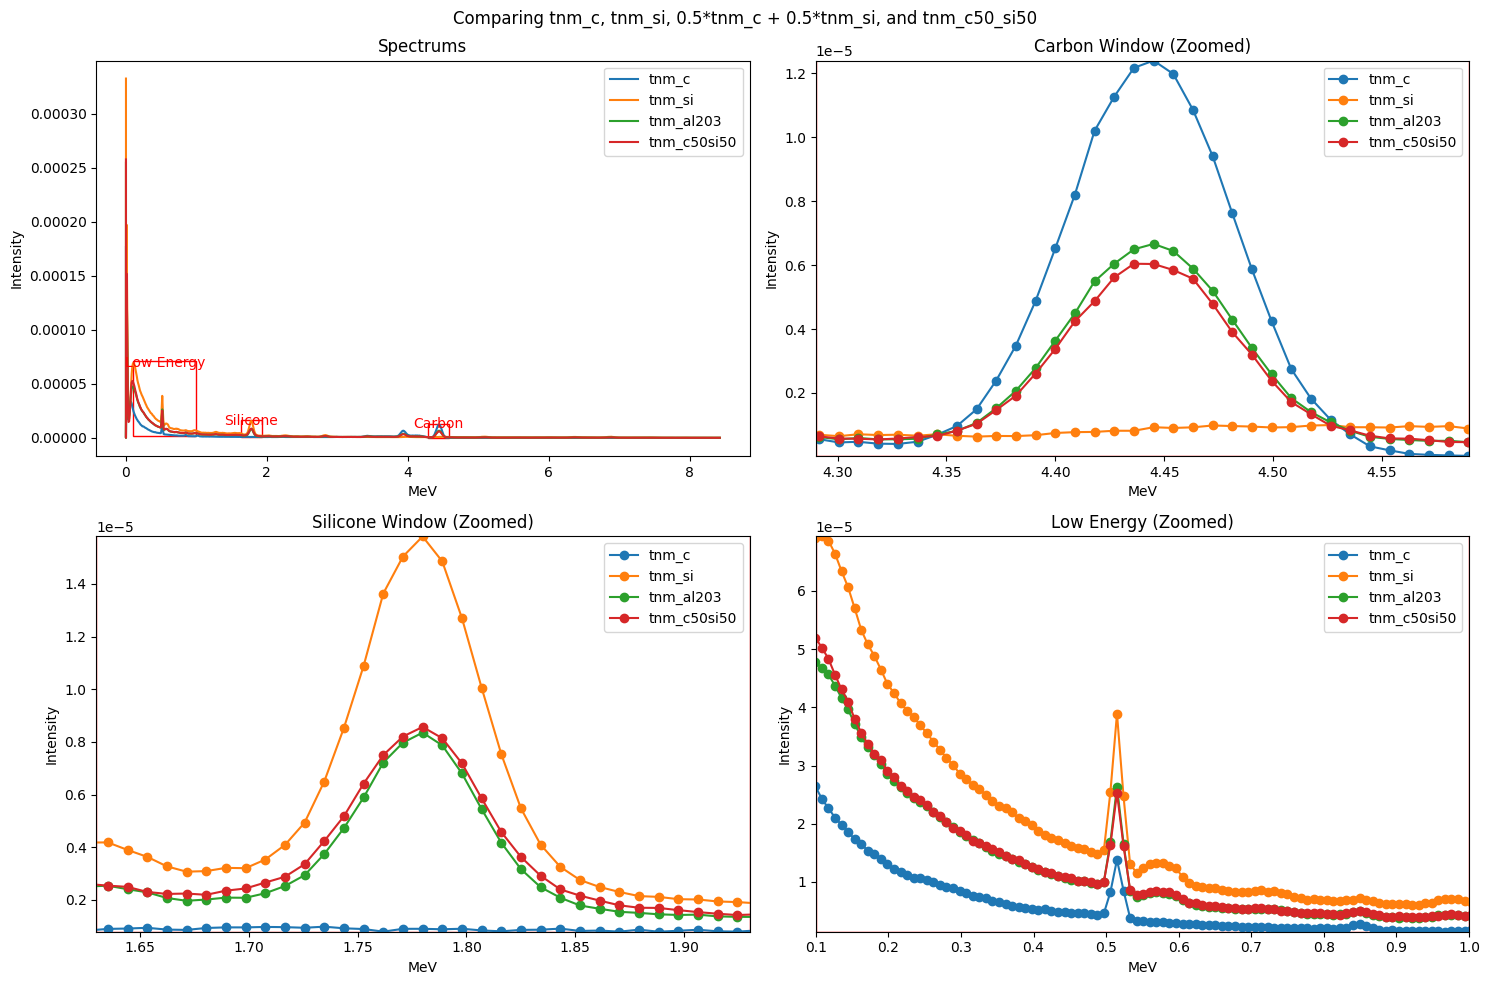

In [36]:
# compare 0.5 * tnm_c + 0.5 * tnm_si with tnm_c50_si50
c_index = filenames[filenames == 'tnm_c'].index[0]

si_index = filenames[filenames == 'tnm_si'].index[0]

c50_si50_index = filenames[filenames == 'tnm_c50si50'].index[0]

c_spectrum = detector_spectrums[c_index][0]
si_spectrum = detector_spectrums[si_index][0]
c50_si50_spectrum = detector_spectrums[c50_si50_index][0]

tnm_c50_si50 = 0.5 * c_spectrum + 0.5 * si_spectrum

spectrums = np.array([c_spectrum, si_spectrum, tnm_c50_si50, c50_si50_spectrum]).reshape(4, 1, -1)

plott(spectrums, 'Comparing tnm_c, tnm_si, 0.5*tnm_c + 0.5*tnm_si, and tnm_c50_si50')

In [ ]:
import scipy.optimize as opt

def linear_combination(x, *params):
    return sum(p * xi for p, xi in zip(params, x))

def residuals(params, x, y):
    return y - linear_combination(x, *params)

def find_linear_combination(x, y):
    initial_guess = [1] / x.shape[0]
    popt, _ = opt.leastsq(residuals, x0=initial_guess, args=(x, y))
    return popt

In [38]:
_ = ['tnm_c', 'tnm_si', 'tnm_c50si50']
_ = [filenames.to_list().index(i) for i in _]

In [39]:
filenames.to_list()

['tnm_c', 'tnm_si', 'tnm_al203', 'tnm_c50si50']

In [40]:
_

[0, 1, 3]

In [41]:
_ = ['tnm_c', 'tnm_si', 'tnm_c50si50']
_ = [filenames.to_list().index(i) for i in _]

# assuming tnm_c50si50 is made up of 50% tnm_c and 50% tnm_si, prove this by finding the linear combination of the two using regression
# find the linear combination of tnm_c and tnm_si that best approximates tnm_c50si50
x = np.array([detector_spectrums[i][0] for i in _[:-1]])
y = detector_spectrums[filenames.to_list().index('tnm_c50si50')][0]
a, b = find_linear_combination(x, y)
a, b
print(f'Linear combination of tnm_c and tnm_si: {a} * tnm_c + {b} * tnm_si')

# plot the linear combination of tnm_c and tnm_si
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=bins, 
    y=y, 
    mode='lines+markers', 
    name='tnm_c50si50',
    marker=dict(size=1),
))
fig.add_trace(go.Scatter(
    x=bins, 
    y=linear_combination(x, a, b), 
    mode='lines+markers', 
    name='Linear Combination',
    marker=dict(size=1),
))
fig.update_layout(
    title='Linear Combination of tnm_c and tnm_si',
    xaxis_title='MeV', 
    yaxis_title='Intensity'
)
fig.show()

Linear combination of tnm_c and tnm_si: 0.4391527979642076 * tnm_c + 0.5414697268069968 * tnm_si


In [42]:
_ = ['tnm_c', 'tnm_si', 'tnm_c50si50']
_ = [filenames.to_list().index(i) for i in _]

# assuming tnm_c50si50 is made up of 50% tnm_c and 50% tnm_si, prove this by finding the linear combination of the two using regression
# find the linear combination of tnm_c and tnm_si that best approximates tnm_c50si50
x = np.array([gebless_spectrums[i][0] for i in _[:-1]])
y = gebless_spectrums[filenames.to_list().index('tnm_c50si50')][0]
a, b = find_linear_combination(x, y)
a, b
print(f'Linear combination of tnm_c and tnm_si: {a} * tnm_c + {b} * tnm_si')

# plot the linear combination of tnm_c and tnm_si
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=bins, 
    y=y, 
    mode='lines+markers', 
    name='tnm_c50si50',
    marker=dict(size=1),
))
fig.add_trace(go.Scatter(
    x=bins, 
    y=linear_combination(x, a, b), 
    mode='lines+markers', 
    name='Linear Combination',
    marker=dict(size=1),
))
fig.update_layout(
    title='Linear Combination of tnm_c and tnm_si',
    xaxis_title='MeV', 
    yaxis_title='Intensity'
)
fig.show()

Linear combination of tnm_c and tnm_si: 0.44894193237503843 * tnm_c + 0.5350152631467069 * tnm_si


In [43]:
# do the same thing including tnm_al203
_ = ['tnm_c', 'tnm_si', 'tnm_al203', 'tnm_c50si50']
_ = [filenames.to_list().index(i) for i in _]

x = np.array([detector_spectrums[i][0] for i in _[:-1]])
y = detector_spectrums[filenames.to_list().index('tnm_c50si50')][0]
a, b, c = find_linear_combination(x, y)
a, b, c
print(f'Linear combination of tnm_c, tnm_si and tnm_al203: {a} * tnm_c + {b} * tnm_si + {c} * tnm_al203')


# plot the linear combination of tnm_c, tnm_si and tnm_al203
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=bins, 
    y=y, 
    mode='lines+markers', 
    name='tnm_c50si50',
    marker=dict(size=1),
))
fig.add_trace(go.Scatter(
    x=bins, 
    y=linear_combination(x, a, b), 
    mode='lines+markers', 
    name='Linear Combination',
    marker=dict(size=1),
))
fig.update_layout(
    title='Linear Combination of tnm_c, tnm_si and tnm_al203',
    xaxis_title='MeV', 
    yaxis_title='Intensity'
)


Linear combination of tnm_c, tnm_si and tnm_al203: 0.38214205043202676 * tnm_c + 0.4448014381556564 * tnm_si + 0.14344867883342863 * tnm_al203


In [44]:
# do the same thing including tnm_al203
_ = ['tnm_c', 'tnm_si', 'tnm_al203', 'tnm_c50si50']
_ = [filenames.to_list().index(i) for i in _]

x = np.array([gebless_spectrums[i][0] for i in _[:-1]])
y = gebless_spectrums[filenames.to_list().index('tnm_c50si50')][0]
a, b, c = find_linear_combination(x, y)
a, b, c
print(f'Linear combination of tnm_c, tnm_si and tnm_al203: {a} * tnm_c + {b} * tnm_si + {c} * tnm_al203')


# plot the linear combination of tnm_c, tnm_si and tnm_al203
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=bins, 
    y=y, 
    mode='lines+markers', 
    name='tnm_c50si50',
    marker=dict(size=1),
))
fig.add_trace(go.Scatter(
    x=bins, 
    y=linear_combination(x, a, b, c), 
    mode='lines+markers', 
    name='Linear Combination',
    marker=dict(size=1),
))
fig.update_layout(
    title='Linear Combination of tnm_c, tnm_si and tnm_al203',
    xaxis_title='MeV', 
    yaxis_title='Intensity'
)

Linear combination of tnm_c, tnm_si and tnm_al203: 0.44268427274592204 * tnm_c + 0.4963275343338617 * tnm_si + 0.04806978190660163 * tnm_al203


In [45]:
# do the same thing including tnm_al203
_ = ['tnm_c', 'tnm_si', 'tnm_al203', 'tnm_c50si50']
_ = [filenames.to_list().index(i) for i in _]

min_bin = 450
max_bin = 550
result_spectrums = detector_spectrums[:, :, min_bin:max_bin]


x = np.array([result_spectrums[i][0] for i in _[:-1]])
y = result_spectrums[filenames.to_list().index('tnm_c50si50')][0]
a, b, c = find_linear_combination(x, y)
a, b, c
print(f'Linear combination of tnm_c, tnm_si and tnm_al203: {a} * tnm_c + {b} * tnm_si + {c} * tnm_al203')


vis_bins = bins[min_bin:max_bin]
# plot the linear combination of tnm_c, tnm_si and tnm_al203
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=vis_bins, 
    y=y, 
    mode='lines+markers', 
    name='tnm_c50si50',
    marker=dict(size=1),
))
fig.add_trace(go.Scatter(
    x=vis_bins, 
    y=linear_combination(x, a, b, c), 
    mode='lines+markers', 
    name='Linear Combination',
    marker=dict(size=1),
))
fig.update_layout(
    title='Linear Combination of tnm_c, tnm_si and tnm_al203',
    xaxis_title='MeV', 
    yaxis_title='Intensity'
)

Linear combination of tnm_c, tnm_si and tnm_al203: 0.45392904444653914 * tnm_c + 0.4822530465816892 * tnm_si + 0.04991148174003934 * tnm_al203


In [46]:
_ = ['tnm_c', 'tnm_si', 'tnm_c50si50']
_ = [filenames.to_list().index(i) for i in _]

# assuming tnm_c50si50 is made up of 50% tnm_c and 50% tnm_si, prove this by finding the linear combination of the two using regression
# find the linear combination of tnm_c and tnm_si that best approximates tnm_c50si50
x = np.array([soil_fluxes[i][0] for i in _[:-1]])
y = soil_fluxes[filenames.to_list().index('tnm_c50si50')][0]
a, b = find_linear_combination(x, y)
a, b
print(f'Linear combination of tnm_c and tnm_si: {a} * tnm_c + {b} * tnm_si')

# plot the linear combination of tnm_c and tnm_si
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=bins, 
    y=y, 
    mode='lines+markers', 
    name='tnm_c50si50',
    marker=dict(size=1),
))
fig.add_trace(go.Scatter(
    x=bins, 
    y=linear_combination(x, a, b), 
    mode='lines+markers', 
    name='Linear Combination',
    marker=dict(size=1),
))
fig.update_layout(
    title='Linear Combination of tnm_c and tnm_si',
    xaxis_title='MeV', 
    yaxis_title='Intensity'
)
fig.show()

Linear combination of tnm_c and tnm_si: 0.47388790985122575 * tnm_c + 0.4589570319156832 * tnm_si


In [48]:
# do the same thing including tnm_al203
_ = ['tnm_c', 'tnm_si', 'tnm_al203', 'tnm_c50si50']
_ = [filenames.to_list().index(i) for i in _]

min_bin = 450
max_bin = 550
result_spectrums = soil_fluxes[:, :, min_bin:max_bin]


x = np.array([result_spectrums[i][0] for i in _[:-1]])
y = result_spectrums[filenames.to_list().index('tnm_c50si50')][0]
a, b, c = find_linear_combination(x, y)
a, b, c
print(f'Linear combination of tnm_c, tnm_si and tnm_al203: {a} * tnm_c + {b} * tnm_si + {c} * tnm_al203')


vis_bins = bins[min_bin:max_bin]
# plot the linear combination of tnm_c, tnm_si and tnm_al203
fig = go.Figure()
fig.add_trace(go.Scatter(
    x=vis_bins, 
    y=y, 
    mode='lines+markers', 
    name='tnm_c50si50',
    marker=dict(size=1),
))
fig.add_trace(go.Scatter(
    x=vis_bins, 
    y=linear_combination(x, a, b, c), 
    mode='lines+markers', 
    name='Linear Combination',
    marker=dict(size=1),
))
fig.update_layout(
    title='Linear Combination of tnm_c, tnm_si and tnm_al203',
    xaxis_title='MeV', 
    yaxis_title='Intensity'
)

Linear combination of tnm_c, tnm_si and tnm_al203: 0.4735166634730605 * tnm_c + 0.4685532824102086 * tnm_si + 0.017768081931387267 * tnm_al203
